# EDA for my dataset before starting training and fine-tuning it.
-NOTE: you can find code for all figures for my poster in here.

### [Link to Dataset](https://github.com/udel-biotm-lab/ASUP)

In [1]:
import torch, os
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

2024-05-12 09:24:17.297150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 09:24:54.628526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
train_data = pd.read_csv('GMED2/200K_train_set.csv')
train_data.shape

In [22]:
sample_data = pd.read_csv('saeideh_sample.csv')
dev_data = pd.read_csv('GMED2/20K_dev_set.csv')
test_data = pd.read_csv('GMED2/20K_test_set.csv')
train_data = pd.read_csv('GMED2/200K_train_set.csv')

In [23]:
labels = train_data['Label'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['BACKGROUND', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'OBJECTIVE']

In [24]:
for key, value in enumerate(labels):
    print(value)

BACKGROUND
METHODS
RESULTS
CONCLUSIONS
OBJECTIVE


In [6]:
NUM_LABELS= len(labels)
id2label={id:label for id,label in enumerate(labels)}
label2id={label:id for id,label in enumerate(labels)}

In [7]:
label2id

{'BACKGROUND': 0, 'METHODS': 1, 'RESULTS': 2, 'CONCLUSIONS': 3, 'OBJECTIVE': 4}

In [8]:
id2label

{0: 'BACKGROUND', 1: 'METHODS', 2: 'RESULTS', 3: 'CONCLUSIONS', 4: 'OBJECTIVE'}

### Another way of numeric_label with factorize method

In [15]:
train_data['labels_num'] = pd.factorize(train_data.Label)[0]
train_data.head()

,Sentence,Label,labels_num
0,Each approach has its own problems and limits.,BACKGROUND,0
1,Difficultieswith interpretation of DNA histogr...,BACKGROUND,0
2,Aim of this research was to develop a computer...,BACKGROUND,0
3,As a basis for the comparison of normal with t...,METHODS,1
4,Normal diploid cell populations from @ effusio...,METHODS,1


In [10]:
train_data["labels_num"]=train_data.Label.map(lambda x: label2id[x.strip()])

In [11]:
train_data.head()

,Sentence,Label,labels_num
0,Each approach has its own problems and limits.,BACKGROUND,0
1,Difficultieswith interpretation of DNA histogr...,BACKGROUND,0
2,Aim of this research was to develop a computer...,BACKGROUND,0
3,As a basis for the comparison of normal with t...,METHODS,1
4,Normal diploid cell populations from @ effusio...,METHODS,1


### MultiClassification EDA

### Distribution of data in Train set:

In [ ]:
import matplotlib.pyplot as plt

# Create the pie chart
train_data.Label.value_counts().plot(kind='pie', figsize=(10, 10))

# Save the plot to a PDF file
plt.savefig('/tarindatadistribution.pdf')

# Show the plot as well
plt.show()


<Axes: ylabel='count'>

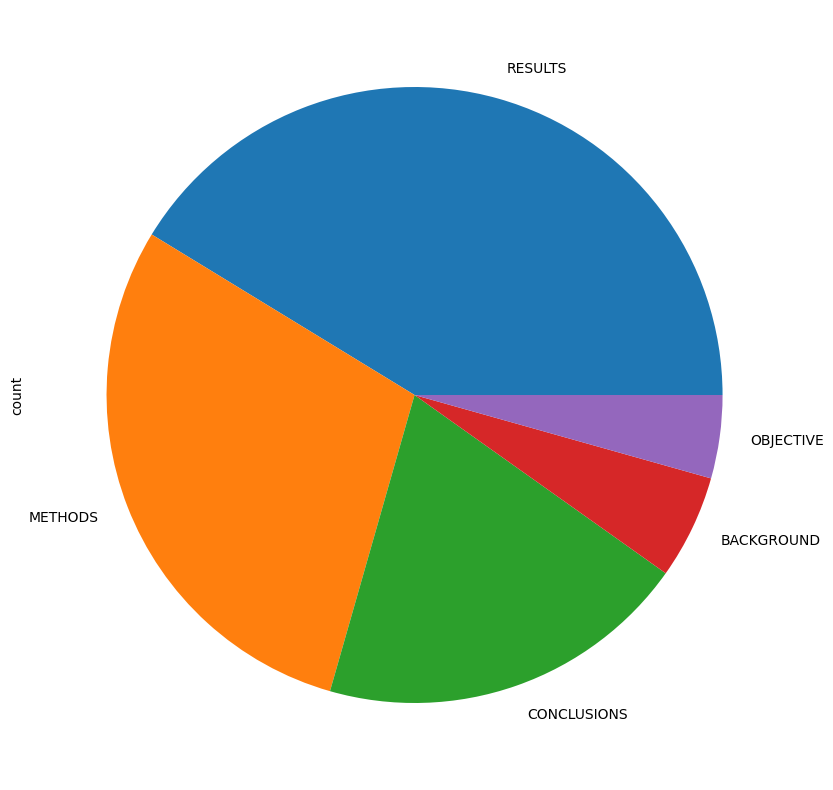

In [33]:
train_data.Label.value_counts().plot(kind='pie', figsize=(10,10))

In [16]:
train_data.describe()

,labels_num
count,4.646457e+06
mean,1.881118e+00
std,9.315949e-01
min,0.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,2.000000e+00
max,4.000000e+00


### Demonestration of Word Cloud for Train Dataset

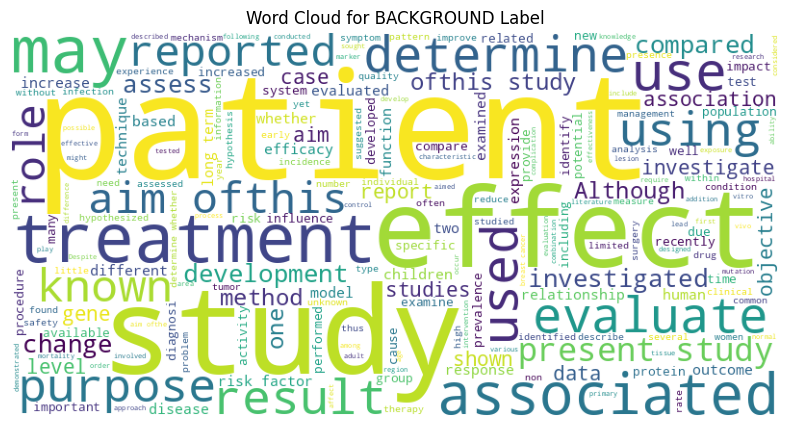

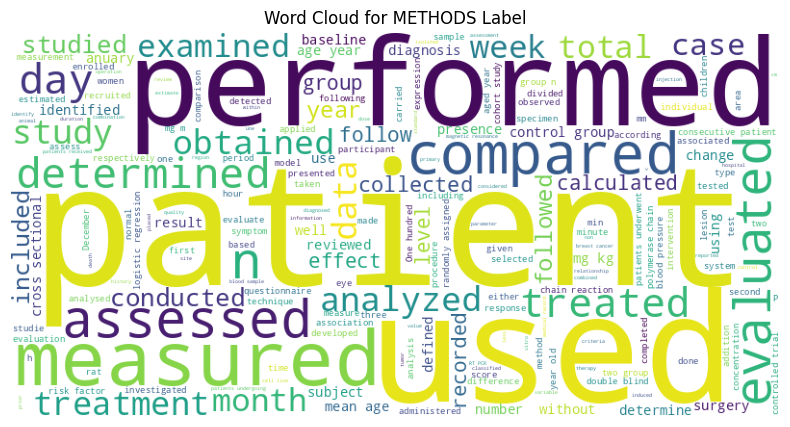

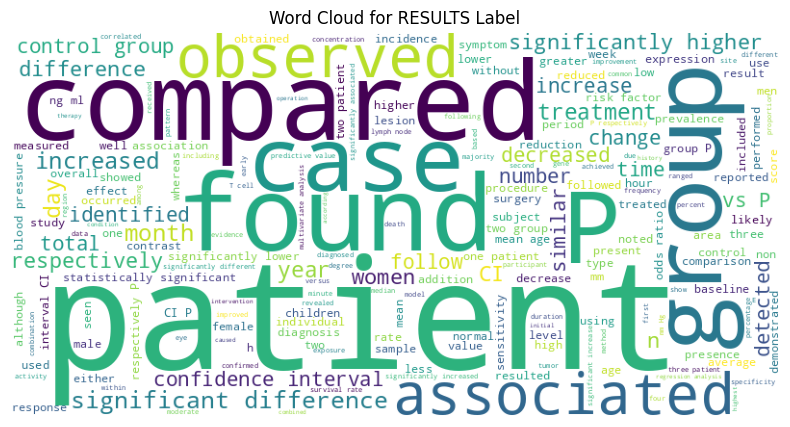

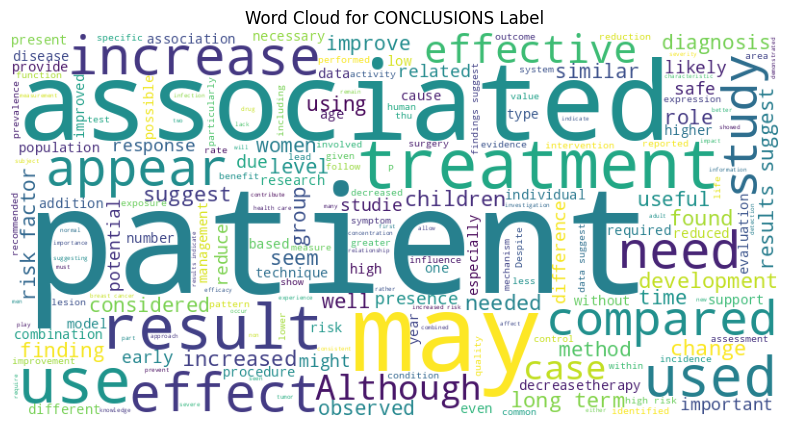

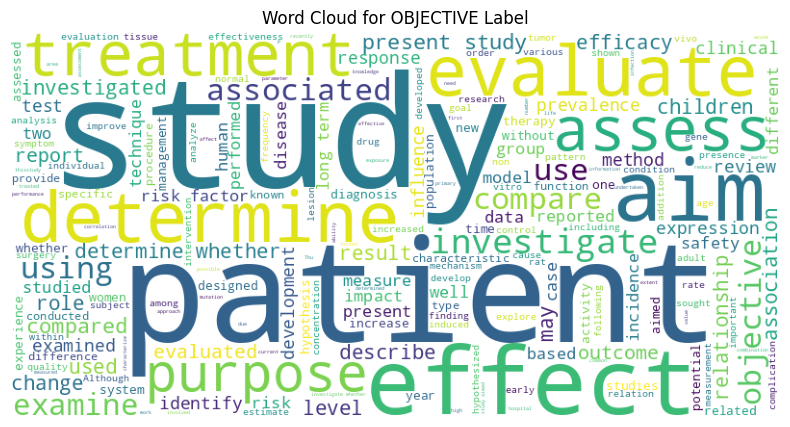

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('GMED2/200K_train_set.csv')

# Function to generate and display a word cloud for a given text
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate a word cloud for each specific label
labels = ["BACKGROUND", "METHODS", "RESULTS", "CONCLUSIONS", "OBJECTIVE"]
for label in labels:
    # Filter sentences by label
    filtered_text = " ".join(df[df['Label'] == label]['Sentence'].tolist())
    # Generate and display the word cloud
    generate_word_cloud(filtered_text, f"Word Cloud for {label} Label")


### Distribution of Dev set

<Axes: ylabel='count'>

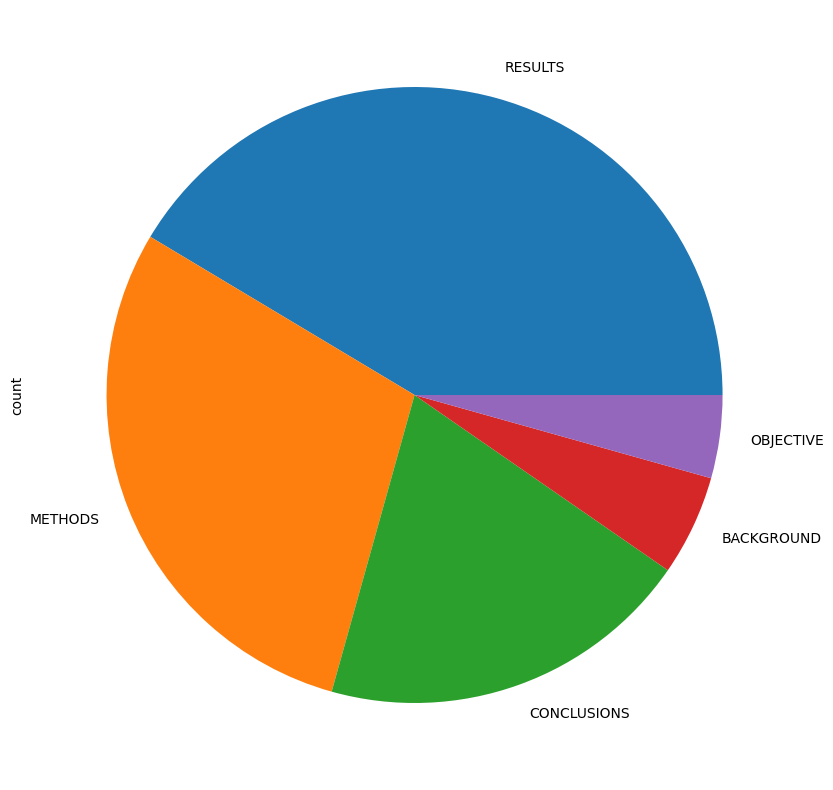

In [13]:
dev_data.Label.value_counts().plot(kind='pie', figsize=(10,10))

### Distribution of test set

<Axes: ylabel='count'>

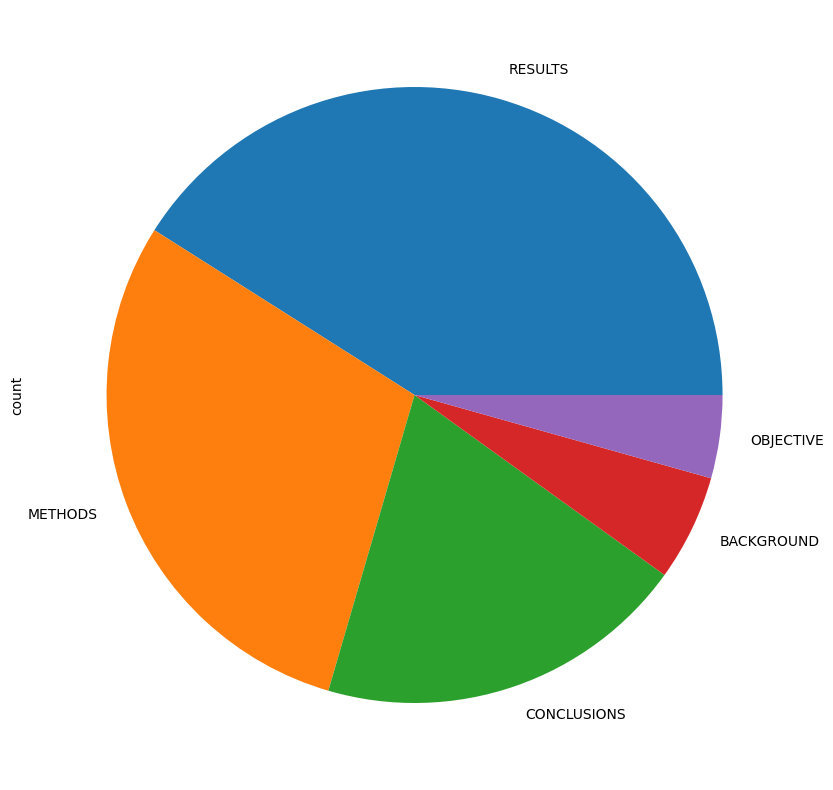

In [14]:
test_data.Label.value_counts().plot(kind='pie', figsize=(10,10))

In [12]:
dev_data["labels_num"]=dev_data.Label.map(lambda x: label2id[x.strip()])
dev_data

,Sentence,Label,labels_num
0,The present work sets out to investigate the c...,BACKGROUND,0
1,Particular consideration will be given to the ...,BACKGROUND,0
2,"In several experiments, a total of @ pigs--par...",METHODS,1
3,"All large parenchymatous organs, as well as he...",METHODS,1
4,"In mice and rats, joints of the extremities we...",METHODS,1
...,...,...,...
202472,In another nine cases the clinical diagnoses i...,RESULTS,2
202473,Two cases strongly mimicked tubercular lymphad...,RESULTS,2
202474,FNA may help diagnosis of a parasitic aetiolog...,CONCLUSIONS,3
202475,Cysticercosis should be an integral part of th...,CONCLUSIONS,3


In [42]:
test_data["labels_num"]=test_data.Label.map(lambda x: label2id[x.strip()])
test_data

,Sentence,Label,labels_num
0,Results ofhistopathologic examination of the t...,BACKGROUND,0
1,An immunohistochemical and electron microscopi...,BACKGROUND,0
2,Immunohistochemistry was performed on @-micron...,METHODS,1
3,Electron microscopy was performed on thin sect...,METHODS,1
4,The cuboidal epithelial cells that comprise th...,RESULTS,2
...,...,...,...
202421,"At @-year follow-up, the estimated cumulative ...",RESULTS,2
202422,The Vanguard endograft was related to a higher...,RESULTS,2
202423,The combined in-hospital or AAA-related mortal...,RESULTS,2
202424,Early abdominal endografts are associated with...,CONCLUSIONS,3


In [34]:
# Encode labels as integers
label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['Label'])
dev_data['label'] = label_encoder.transform(dev_data['Label'])
test_data['label'] = label_encoder.transform(test_data['Label'])

### Tokenizer with PreTrained Model:

In [26]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", max_length=512)

In [27]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

## Splitting dataframe

In [37]:
SIZE= train_data.shape[0]
SIZE

4646457

In [39]:
train_data.head()

,Sentence,Label,label
0,Each approach has its own problems and limits.,BACKGROUND,0
1,Difficultieswith interpretation of DNA histogr...,BACKGROUND,0
2,Aim of this research was to develop a computer...,BACKGROUND,0
3,As a basis for the comparison of normal with t...,METHODS,2
4,Normal diploid cell populations from @ effusio...,METHODS,2


In [ ]:
# Tokenize the datasets with tqdm progress bar
train_dataset = train_dataset.map(tokenize_function, batched=True, batch_size=5000, desc="Tokenizing train data")
dev_dataset = dev_dataset.map(tokenize_function, batched=True, batch_size=5000, desc="Tokenizing dev data")
test_dataset = test_dataset.map(tokenize_function, batched=True, batch_size=5000, desc="Tokenizing test data")


In [23]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [25]:
train_dataloader = DataLoader(train_encodings, train_labels)
val_dataloader = DataLoader(val_encodings, val_labels)
test_dataset = DataLoader(test_encodings, test_labels)

## Training with Trainer Class

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

## compute_metrics

argmax(): The NumPy method argmax() returns the index of the maximum value along a given axis. In a classification problem, we are interested in finding the class with the highest probability for each observation.

(-1): The (-1) inside argmax() represents the axis along which the operation should be performed. In Python, negative indices are used to access elements from the end. So, (-1) here means the last axis, which is the columns in a 2D array.

In [28]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./FineTuneBERT', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory                 
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

Failure while loading azureml_run_type_providers. Failed to load entrypoint azureml.scriptrun = azureml.core.script_run:ScriptRun._from_run_dto with exception (packaging 23.0 (c:\users\pc60\appdata\local\programs\python\python310\lib\site-packages), Requirement.parse('packaging<22.0,>=20.0')).


In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=val_dataloader,            
    compute_metrics= compute_metrics
)

In [ ]:
trainer.train()

In [ ]:
q=[trainer.evaluate(eval_dataset=df_org) for df_org in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [ ]:
def predict(text):
    """
    Predicts the class label for a given input text

    Args:
        text (str): The input text for which the class label needs to be predicted.

    Returns:
        probs (torch.Tensor): Class probabilities for the input text.
        pred_label_idx (torch.Tensor): The index of the predicted class label.
        pred_label (str): The predicted class label.
    """
    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    """ Explanation outputs: The BERT model returns a tuple containing the output logits (and possibly other elements depending on the model configuration). In this case, the output logits are the first element in the tuple, which is why we access it using outputs[0].

    outputs[0]: This is a tensor containing the raw output logits for each class. The shape of the tensor is (batch_size, num_classes) where batch_size is the number of input samples (in this case, 1, as we are predicting for a single input text) and num_classes is the number of target classes.

    softmax(1): The softmax function is applied along dimension 1 (the class dimension) to convert the raw logits into class probabilities. Softmax normalizes the logits so that they sum to 1, making them interpretable as probabilities. """

    # Get the index of the class with the highest probability
    # argmax() finds the index of the maximum value in the tensor along a specified dimension.
    # By default, if no dimension is specified, it returns the index of the maximum value in the flattened tensor.
    pred_label_idx = probs.argmax()

    # Now map the predicted class index to the actual class label 
    # Since pred_label_idx is a tensor containing a single value (the predicted class index), 
    # the .item() method is used to extract the value as a scalar
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label
